### Connecting GoogleColab with GoogleDrive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Changing the directory

In [ ]:
%cd /content/drive/MyDrive/Tutorials/Tutorial 3

/content/drive/MyDrive/Tutorials/Tutorial 3


Checking the content of the current directory

In [ ]:
!ls

 Car_Advertisement.csv	     'Tutorial 3 Template.ipynb'
'Tutorial 3 Solution.ipynb'


### Importing the basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sb

### Importing the data

In [ ]:
data = pd.read_csv("")

### Converting the categorical data to numerical data

In the data,  there are 2 columns with the catergorical values that need to be converted to numerical values. 

* Gender
* Purchased

Also, the dataset is complete and there is no null cell :))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


Converting the values of the "purchased" column

In [ ]:
# getting the unique values in the purchase column
data[''].unique()

In [ ]:
# make the dictionary of the items in the "purchased" column
purchases = {}
data[''] = data[''].map()
data[''].head()  # checking if the changes are applied

Converting the values of the "gender" column

In [ ]:
# getting the unique values in the gender column
data[""].unique()

In [ ]:
gender = {}
data[''] = data[''].map()
data[''].head()

Let's check the dataset to see if chanages are applied

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   UserID           400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


### Cleaning the data from the outliers

Box plots before cleaning the data

In [ ]:
sb.boxplot(x='Purchased', y='Age', data=data)

In [ ]:
sb.boxplot(x='Purchased', y='EstimatedSalary', data=data)

Now, let's clean the data

In [ ]:
data = data[((data['Age']<55) & (data['Purchased']==0)) | (data['Purchased']==1)]

In [ ]:
sb.boxplot(x='Purchased', y='Age', data=data)

In [ ]:
data = data[ ((data['EstimatedSalary']<120000) & (data['Purchased']==0)) | (data['Purchased']==1)]

In [ ]:
sb.boxplot(x='Purchased', y='EstimatedSalary', data=data)

### Exploring the data

Here, we will check the correlation between "Purchased" column and the other colunms

You can find more info about the heatmap function in Seaborn [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender             0.042469
UserID             0.007120
Name: Purchased, dtype: float64

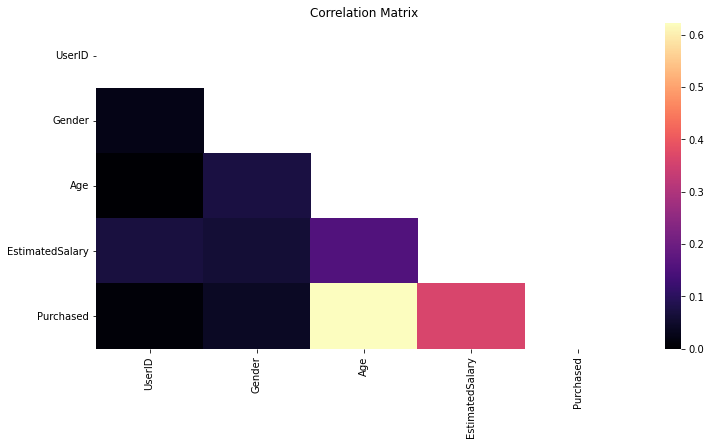

In [ ]:
# creating the correlation matrix
##  start the code here

## End

# visualizing the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# getting the correlation values with the purchased column
## Start the code here

## End

### Splitting the train and test data

In [ ]:
## Code here

## End

# splitting the input and the output from the trainining set
Y_train = train_data[['Purchased']].copy()

# removing the useless features and the output from the dataset
X_train = train_data.drop()  # drop "Purchased", "UserID", and 'Gender'

Let's check the type of the data 

In [ ]:
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### data visualization

In [ ]:
# making a function to plot the data
def plot_scatter_with_labels(X1, X2, Y, xlabel='Age', ylabel='Estimated Salary'):
  df = pd.DataFrame(dict(x1=X1, x2=X2, label=Y))
  groups = df.groupby('label')
  for number, group in groups:
    if number == 0:
      name = 'Not Purchased'
    elif number == 1:
      name = 'Purchased'
    plt.plot(group.x1, group.x2, marker='o', linestyle='', ms=3, label=name)

  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)


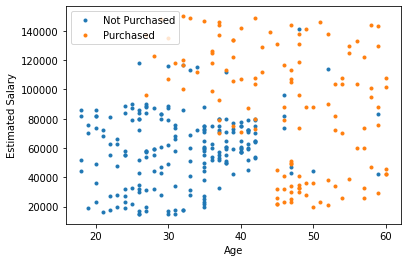

In [ ]:
plot_scatter_with_labels(train_data['Age'], train_data['EstimatedSalary'], train_data['Purchased'])

### Scaling the features

We standardize all the data using their mean and standard deviation

$$ \hat{x_i} = \frac{x_i-\mu}{\sigma_i}$$

In [ ]:
## Code here


## end

<class 'numpy.ndarray'>


### Exploring different machine learning tools

In [ ]:
from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Converting the output to numpy array and changing the shape

In [ ]:
Y_train = Y_train.to_numpy()
Y_train = Y_train.ravel()

#### Discriminant Analysis Classifier

In [ ]:
da_clf = LinearDiscriminantAnalysis()
da_clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(da_clf, X_train, Y_train, scoring='accuracy', cv=5)  # 5-fold
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores = {}
avg_cv_scores['DA'] = np.average(scores)

[0.84375  0.8125   0.84375  0.90625  0.828125]
Averaged prediction accuracy =  0.846875


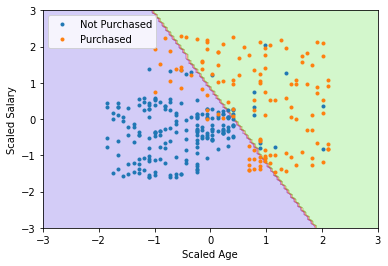

In [ ]:
def plot_decision_boundary(clf, axes, inverse_transform=False):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(100, 100)
    if inverse_transform:
        X = scaler.inverse_transform(np.c_[x0s, x1s])
        x0, x1 = np.meshgrid(X[:,0], X[:,1])
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

def plot_prediction_results(clf, X, Y):
    plot_decision_boundary(clf, [-3, 3, -3, 3])
    plot_scatter_with_labels(X[:,0], X[:,1], Y, xlabel='Scaled Age', ylabel='Scaled Salary')
    
plot_prediction_results(da_clf, X_train, Y_train)

#### Naive Bayes Classifier

[0.890625 0.921875 0.875    0.9375   0.90625 ]
Averaged prediction accuracy =  0.90625


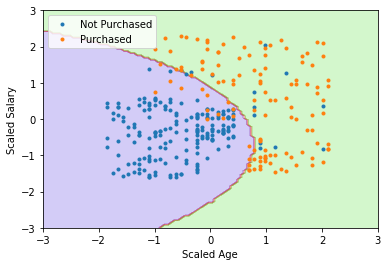

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
scores = cross_val_score(nb_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['NB'] = np.average(scores)
plot_prediction_results(nb_clf, X_train, Y_train)

#### K-Nearst Neighbors

[0.890625 0.875    0.890625 0.953125 0.90625 ]
Averaged prediction accuracy =  0.903125


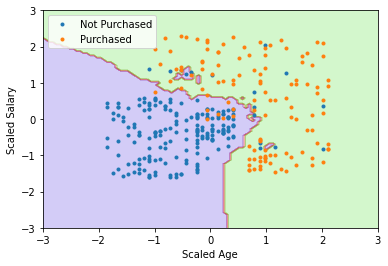

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5) # change n_neighbors; boundary becomes smoother with increasing value of K
knn_clf.fit(X_train, Y_train)
scores = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['KNN'] = np.average(scores)
plot_prediction_results(knn_clf, X_train, Y_train)

#### Linear SVM

[0.84375  0.8125   0.8125   0.921875 0.828125]
Averaged prediction accuracy =  0.84375


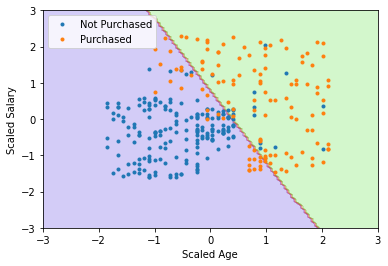

In [ ]:
svmln_clf = SVC(kernel='linear')
svmln_clf.fit(X_train, Y_train)
scores = cross_val_score(svmln_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-linear'] = np.average(scores)
plot_prediction_results(svmln_clf, X_train, Y_train)

#### Nonlinear SVM (Gaussian Kernel)

[0.90625  0.921875 0.90625  0.953125 0.90625 ]
Averaged prediction accuracy =  0.91875


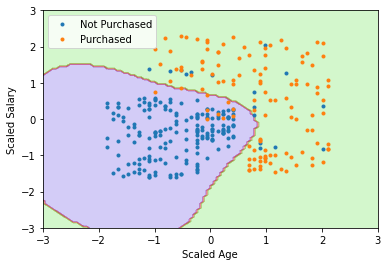

In [ ]:
svmrbf_clf = SVC(kernel='rbf')
svmrbf_clf.fit(X_train, Y_train)
scores = cross_val_score(svmrbf_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear'] = np.average(scores)
plot_prediction_results(svmrbf_clf, X_train, Y_train)

#### Decision Tree

[0.890625 0.90625  0.890625 0.96875  0.921875]
Averaged prediction accuracy =  0.915625


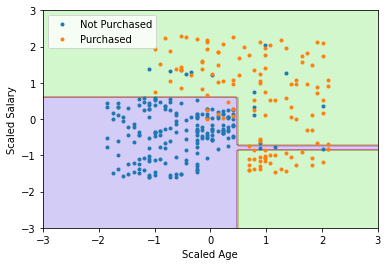

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3) # Play with hyperparameter
tree_clf.fit(X_train, Y_train)
scores = cross_val_score(tree_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Decision Tree'] = np.average(scores)
plot_prediction_results(tree_clf, X_train, Y_train)

In [ ]:
sorted_scores = sorted(avg_cv_scores.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM-nonlinear', 0.91875),
 ('Decision Tree', 0.915625),
 ('NB', 0.90625),
 ('KNN', 0.903125),
 ('DA', 0.846875),
 ('SVM-linear', 0.84375)]

#### using the models to predict the testset

In [ ]:
X_test = scaler.transform(test_data[['Age', 'EstimatedSalary']])
# X_test = X_test.to_numpy()

In [ ]:
Y_test = test_data['Purchased']

Using the trained models to do prediction on the test set

In [ ]:
test_pred_score = {}

In [ ]:
# Discriminant Analysis Classifier
Y_test_pred_da = da_clf.predict(X_test)
test_pred_score['DA'] = accuracy_score(Y_test, Y_test_pred_da)

# Naive Bayes Classifier
Y_test_pred_nb = nb_clf.predict(X_test)
test_pred_score['NB'] = accuracy_score(Y_test, Y_test_pred_nb)

# K-Nearst Neighbors
Y_test_pred_knn = knn_clf.predict(X_test)
test_pred_score['KNN'] = accuracy_score(Y_test, Y_test_pred_knn)

# Linear SVM
Y_test_pred_svmln = svmln_clf.predict(X_test)
test_pred_score['SVM_Linear'] = accuracy_score(Y_test, Y_test_pred_svmln)

# Nonlinear SVM (Gaussian Kernel)
Y_test_pred_svmrbf = svmrbf_clf.predict(X_test)
test_pred_score['SVM_nonlinear'] = accuracy_score(Y_test, Y_test_pred_svmrbf)

# Decision Tree
Y_test_pred_tree_clf = tree_clf.predict(X_test)
test_pred_score['Decision Tree'] = accuracy_score(Y_test, Y_test_pred_tree_clf)

In [ ]:
sorted_scores = sorted(test_pred_score.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM_nonlinear', 0.875),
 ('NB', 0.8625),
 ('KNN', 0.8625),
 ('Decision Tree', 0.85),
 ('SVM_Linear', 0.8375),
 ('DA', 0.825)]